# Digital Signal Processing

## Solutions: Exercise 2

### Part 1: Spectrum Analysis of Deterministic Signals

#### Task 1: DFT of real valued series
The function `lfft` realizes the algorithm (which is described in paragraph 7.1) to transform a real valued series $x_1(k)$ of length $2N$ with a $N$-point FFT.
To verify the correctness of our function, we calculate the normalized quadratic variation between a `fft()`- and `lfft()`-spectra.
The result is within the scope of the computer accuracy.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def lfft(x1):
    lx = len(x1)
    if (lx%2) == 1:                                 # Check for uneven signal length
        print('WARNING: This function requires an even amount of data values. The last sample will be discarded.')
        x1 = x1[0:lx-1]
        lx =len(x1)
    N = lx//2                                       # Length of real x1: 2N
    y = x1[0:2*N:2]                                 # Gl. (7.1.11a), all values with even indices
    z = x1[1:2*N:2]                                 # Gl. (7.1.11b). all values with odd indices
    x = y + 1j*z                                    # Gl. (7.1.12)
    # Lenght of complex x: N
    X = np.fft.fft(x)                               # Length of X: N
    X = np.append(X,X[0])                           # Length of X: N+1
    Y = (X + np.conj(np.flip(X)))/2                 # Gl. (7.1.7)
    Z = (X - np.conj(np.flip(X)))/2/1j              # Gl. (7.1.8)
    k = np.arange(0,N+1)
    X1 = Y + np.exp(-1j*np.pi*k/N)*Z                # Gl. (7.1.17)
    X1 = np.append(X1, np.flip(np.conj(X1[1:N])))   # Length of X1: 2N
    return X1

N = 2*10
x = np.random.randn(N)
X1 = np.fft.fft(x)
X2 = lfft(x)
difference = np.mean(np.abs(X1-X2)**2)
print(difference)

6.911750102009824e-31


#### Task 2: DFT: truncation error / sub-sampling
$\tilde{x}_{\nu}(k)$ is the periodic continuation of the series $x_{\nu}(k)$. The spectrum of the corresponding continuous sinusoidal signal $x_{\nu}(t)$ with period $T$ is exactly described by $\textrm{DFT}\{\tilde{x}_{\nu}(k) \} $, if

1. $\tilde{x}_{\nu}(k)$ is identical with the sampled continuous sinusoidal signal $\tilde{x}_{\nu}(t)|_{t=kT_A}$
2. AND the sampling theorem is fulfilled, i.e. the sampling raite $1/T_A$ is higher than double of the frequency of the contiuous sinusoidal signal $\tilde{x}_{\nu}(t)$. In other words: $T_A < T/2$.

**Signal** $x_1(k)$**:** In both cases, the sampling theorem is fulfilled (the continuous sinusoidal signal is plotted dotted). For $k = 0 \ldots 7$, the condition (1) is offended, so that $X_1(n)$ shows spectral components at many frequencies (instead of only two). For $k = 0 \ldots 63$, both conditions are fulfilled. The spectrum of the continuous sinusoidal signal is obtained.

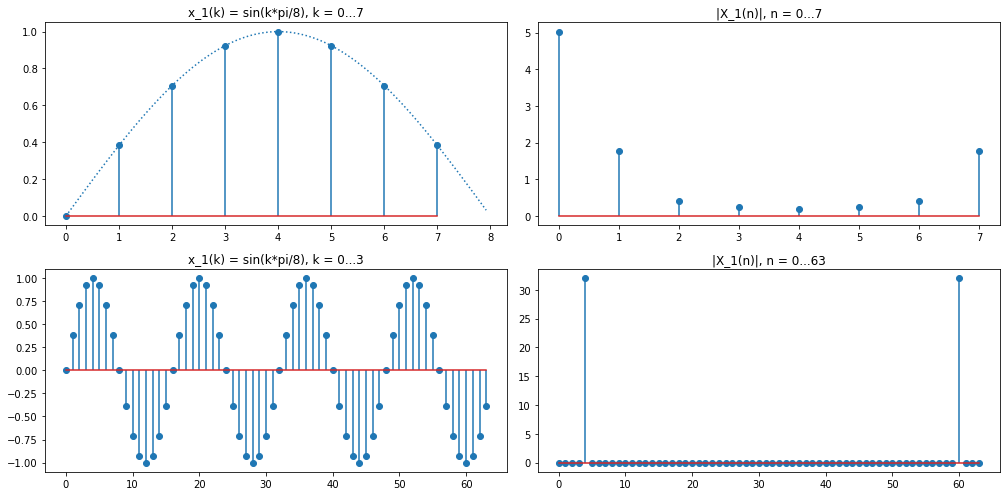

In [4]:
import matplotlib.pyplot as plt
import numpy as np

kk08 = np.arange(0,8,1)
kk64 = np.arange(0,64,1)
kk100 = np.arange(0,8,8/100)
x1_08 = np.sin(kk08*np.pi/8)
x1_64 = np.sin(kk64*np.pi/8)
x1_100 = np.sin(kk100*np.pi/8)

# Calculating DTF with fft
X1_08 = np.fft.fft(x1_08)
X1_64 = np.fft.fft(x1_64)

# Graphical output
fig, axs = plt.subplots(2, 2, figsize=(14, 7))
axs[0, 0].plot(kk100,x1_100, ':')
axs[0, 0].stem(kk08,x1_08, use_line_collection=True)
axs[0, 1].stem(kk08,np.abs(X1_08), use_line_collection=True)
axs[1, 0].stem(kk64,x1_64, use_line_collection=True)
axs[1, 1].stem(kk64,np.abs(X1_64), use_line_collection=True)

axs[0, 0].set_title('x_1(k) = sin(k*pi/8), k = 0...7', fontsize='large')
axs[0, 1].set_title('|X_1(n)|, n = 0...7', fontsize='large')
axs[1, 0].set_title('x_1(k) = sin(k*pi/8), k = 0...3', fontsize='large')
axs[1, 1].set_title('|X_1(n)|, n = 0...63', fontsize='large')

plt.tight_layout()
plt.show()

**Signal** $x_2(k)$**:** Both conditions are fulfilled here, so that in both cases, the spectrum of the continuous sinusoidal signal is plotted.

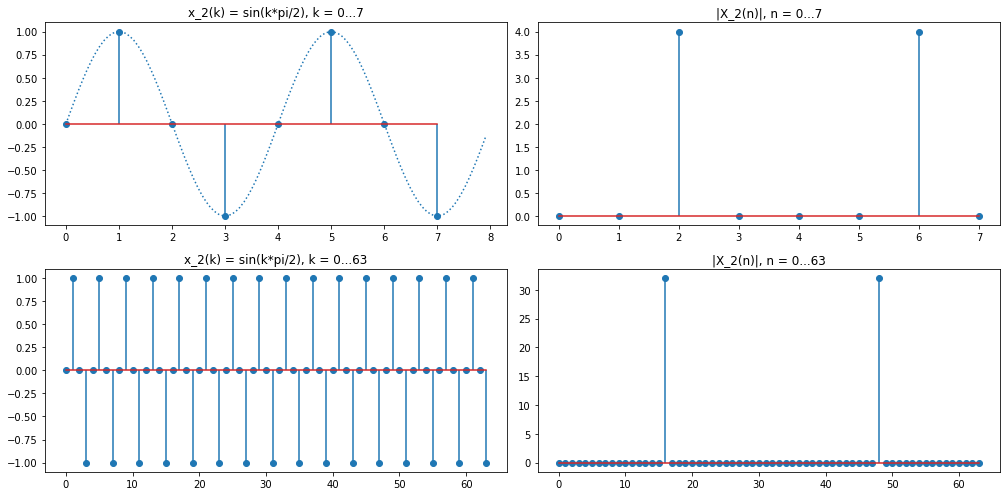

In [7]:
import matplotlib.pyplot as plt
import numpy as np

kk08 = np.arange(0,8,1)
kk64 = np.arange(0,64,1)
kk100 = np.arange(0,8,8/100)
x2_08 = np.sin(kk08*np.pi/2)
x2_64 = np.sin(kk64*np.pi/2)
x2_100 = np.sin(kk100*np.pi/2)

# Calculating DTF with fft
X2_08 = np.fft.fft(x2_08)
X2_64 = np.fft.fft(x2_64)

# Graphical output
fig, axs = plt.subplots(2, 2, figsize=(14, 7))
axs[0, 0].plot(kk100,x2_100, ':')
axs[0, 0].stem(kk08,x2_08, use_line_collection=True)
axs[0, 1].stem(kk08,np.abs(X2_08), use_line_collection=True)
axs[1, 0].stem(kk64,x2_64, use_line_collection=True)
axs[1, 1].stem(kk64,np.abs(X2_64), use_line_collection=True)

axs[0, 0].set_title('x_2(k) = sin(k*pi/2), k = 0...7', fontsize='large')
axs[0, 1].set_title('|X_2(n)|, n = 0...7', fontsize='large')
axs[1, 0].set_title('x_2(k) = sin(k*pi/2), k = 0...63', fontsize='large')
axs[1, 1].set_title('|X_2(n)|, n = 0...63', fontsize='large')

plt.tight_layout()
plt.show()

**Signal** $x_3(k)$**:** The sampling theorem is offended here. Even though the frequency of the continuous sinusoidal signal is higher than $x_2(t)$, the sampling rate is not increased accordingly. Because $x_3(k)$ corresponds with $x_2(k)$ until the sign, the FFT yields exactly the same results like the signal $x_2(k)$. The spectrum $X_3(n)$ does not describe the spectrum of the continuous sinusoidal signal $x_3(t)$.

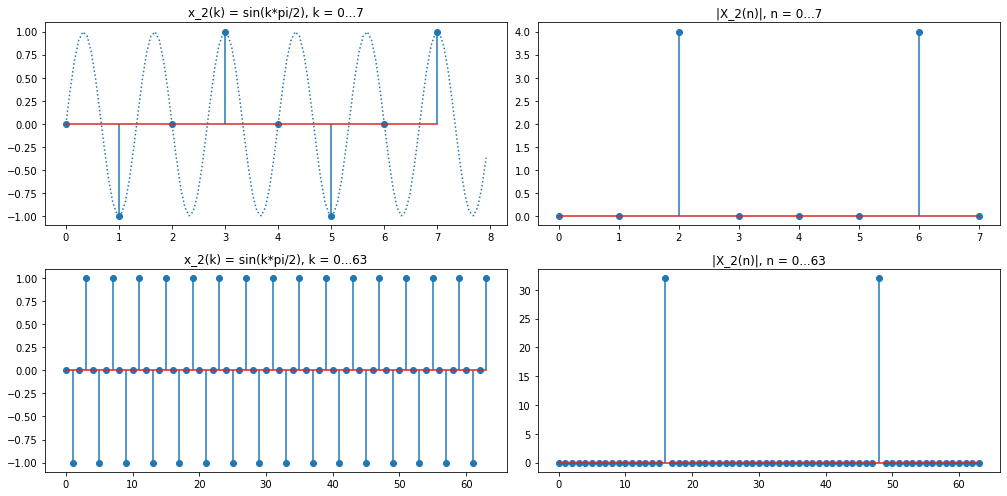

In [8]:
import matplotlib.pyplot as plt
import numpy as np

kk08 = np.arange(0,8,1)
kk64 = np.arange(0,64,1)
kk100 = np.arange(0,8,8/100)
x3_08 = np.sin(kk08*np.pi*3/2)
x3_64 = np.sin(kk64*np.pi*3/2)
x3_100 = np.sin(kk100*np.pi*3/2)

# Calculating DTF with fft
X3_08 = np.fft.fft(x3_08)
X3_64 = np.fft.fft(x3_64)

# Graphical output
fig, axs = plt.subplots(2, 2, figsize=(14, 7))
axs[0, 0].plot(kk100,x3_100, ':')
axs[0, 0].stem(kk08,x3_08, use_line_collection=True)
axs[0, 1].stem(kk08,np.abs(X3_08), use_line_collection=True)
axs[1, 0].stem(kk64,x3_64, use_line_collection=True)
axs[1, 1].stem(kk64,np.abs(X3_64), use_line_collection=True)

axs[0, 0].set_title('x_2(k) = sin(k*pi/2), k = 0...7', fontsize='large')
axs[0, 1].set_title('|X_2(n)|, n = 0...7', fontsize='large')
axs[1, 0].set_title('x_2(k) = sin(k*pi/2), k = 0...63', fontsize='large')
axs[1, 1].set_title('|X_2(n)|, n = 0...63', fontsize='large')

plt.tight_layout()
plt.show()

#### Task 3: leakage reduction by windowing
**Series** $x_1(k)$ **without windowing:** If the DFT-length $N=64$ is chosen, exactly $m=4$ periods of the sinusoidal signal falls in the DFT-window with length $NT_A$. The portrayed periodic repetition of the series $x_1(k)$ after $N$ values gives a continuous plot without jumps. The leakage effect does not exist, i.e. the spectral function $X_1(n)$ reproduces the correct spectra of the continuous sinusoidal oscillation.

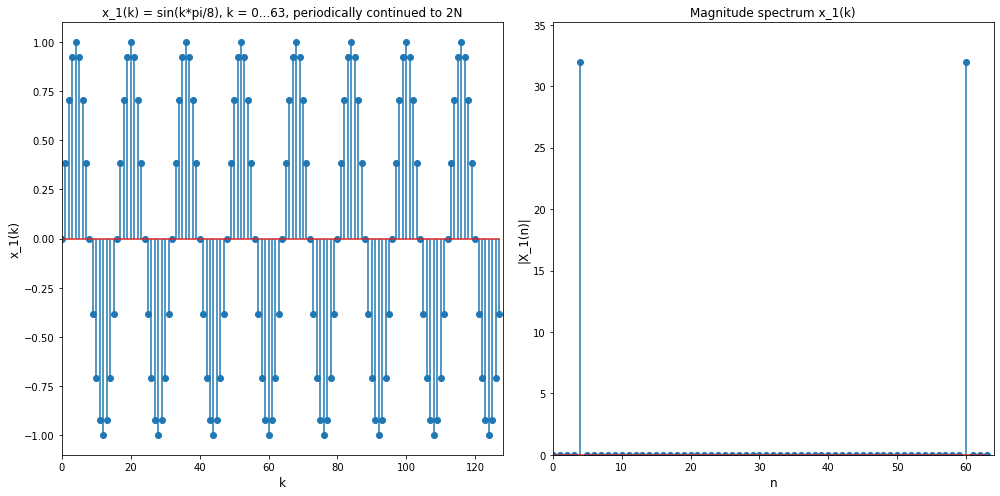

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generating the Signal-Vector
N = 64
kk = np.arange(0,N,1)
kk2 = np.arange(0,2*N,1)

x1 = np.sin(kk*np.pi/8)
x1_128  = np.append(x1,x1)

X1 = np.fft.fft(x1)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].stem(kk2,x1_128, use_line_collection=True)
axs[1].stem(kk,np.abs(X1), use_line_collection=True)

axs[0].set_xlim(0,2*N)
axs[1].set_xlim(0,N)
axs[0].set_ylim(-1.1,1.1)
axs[1].set_ylim(0,1.1*N/2)

axs[0].set_title('x_1(k) = sin(k*pi/8), k = 0...63, periodically continued to 2N', fontsize='large')
axs[1].set_title('Magnitude spectrum x_1(k)', fontsize='large')

axs[0].set_xlabel('k', fontsize='large')
axs[1].set_xlabel('n', fontsize='large')

axs[0].set_ylabel('x_1(k)', fontsize='large')
axs[1].set_ylabel('|X_1(n)|', fontsize='large')

plt.tight_layout()
plt.show()

**Series** $x_1(k)$ **with windowing:** With the same DFT-length, the series would be weighted next with a Hamming window, i.e. in time domain, multiplied with

\begin{equation*}
f^{Hm}(k) = \left\{
    \begin{array}{l l}	
         0.54 - 0.46 \cdot \text{cos}(\frac{2\pi k}{N-1}),& 0\leq k \leq N-1\\
         0,  & \text{else}
    \end{array}\right.\;.
\end{equation*}

This corresponds to a convolution with three displaced spectral functions of a rectangular-window in spectral domain, whereby the middle is evaluated with a factor 0.54 (7.4.15). Correspondingly, smaller values of the main spectral lines. Because of the reduced spectral resolution, two other lines emerge.


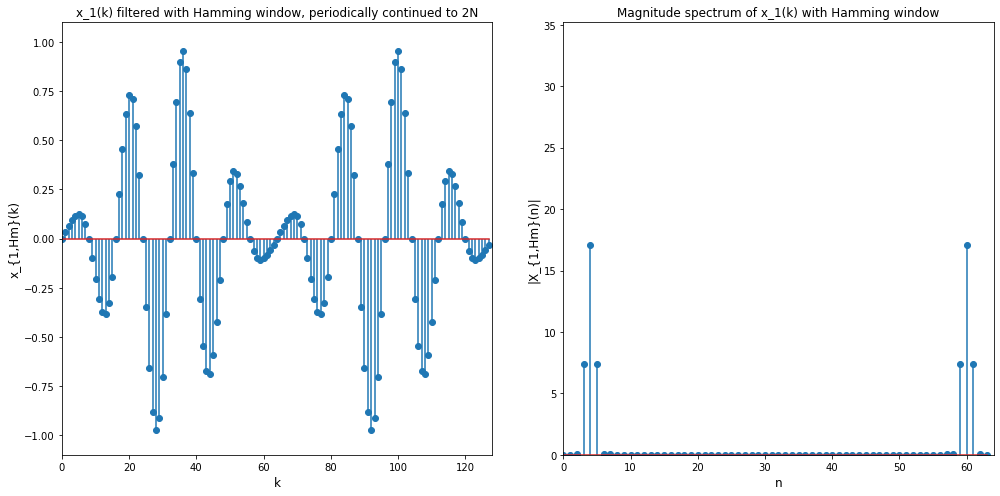

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generating the Signal-Vector
N = 64
kk = np.arange(0,N,1)
kk2 = np.arange(0,2*N,1)

x1 = np.sin(kk*np.pi/8)

x1hm = x1*np.hamming(N)
x1hm_128  = np.append(x1hm,x1hm)

X1hm = np.fft.fft(x1hm)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].stem(kk2,x1hm_128, use_line_collection=True)
axs[1].stem(kk,np.abs(X1hm), use_line_collection=True)

axs[0].set_xlim(0,2*N)
axs[1].set_xlim(0,N)
axs[0].set_ylim(-1.1,1.1)
axs[1].set_ylim(0,1.1*N/2)

axs[0].set_title('x_1(k) filtered with Hamming window, periodically continued to 2N', fontsize='large')
axs[1].set_title('Magnitude spectrum of x_1(k) with Hamming window', fontsize='large')

axs[0].set_xlabel('k', fontsize='large')
axs[1].set_xlabel('n', fontsize='large')

axs[0].set_ylabel('x_{1,Hm}(k)', fontsize='large')
axs[1].set_ylabel('|X_{1,Hm}(n)|', fontsize='large')

plt.tight_layout()
plt.show()

**Series** $x_2(k)$ **without windowing:** For $N=64$, $m=N/20=3.2$ periods of the sinusoidal signal fall into the DFT-window for this signal. The portrayed periodic repetition from $x_2(k)$ to $N$ values show a discontinuous trend with jumps. Because the DFT assumes a periodic continuation of the series outside the considered DFT-window, the \textit{leakage effect} exists because of the jumps: As seen in the figure bellow, the main spectral lines at $n=3$ and $n=61$ "leak" through all matrix dots of the DFT. 

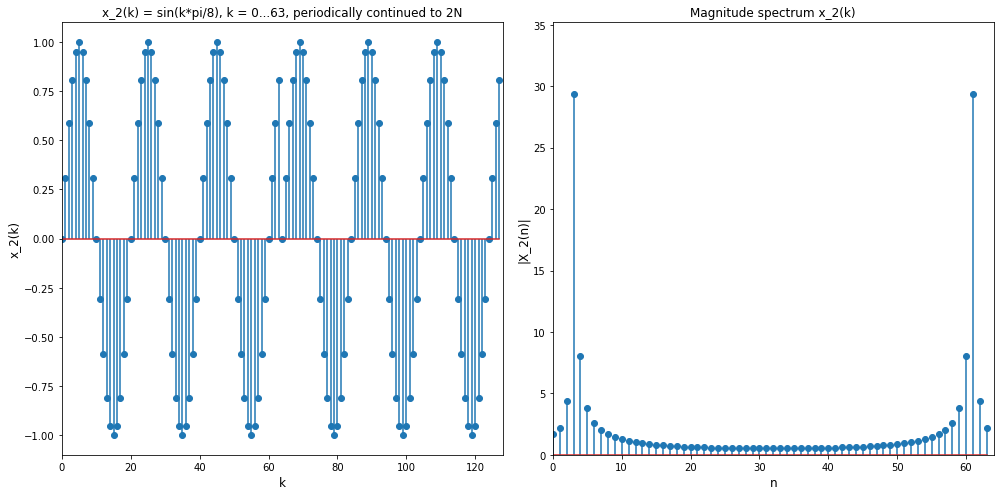

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Generating the Signal-Vector
N = 64
kk = np.arange(0,N,1)
kk2 = np.arange(0,2*N,1)

x2 = np.sin(kk*np.pi/10)
x2_128  = np.append(x2,x2)

X2 = np.fft.fft(x2)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].stem(kk2,x2_128, use_line_collection=True)
axs[1].stem(kk,np.abs(X2), use_line_collection=True)

axs[0].set_xlim(0,2*N)
axs[1].set_xlim(0,N)
axs[0].set_ylim(-1.1,1.1)
axs[1].set_ylim(0,1.1*N/2)

axs[0].set_title('x_2(k) = sin(k*pi/8), k = 0...63, periodically continued to 2N', fontsize='large')
axs[1].set_title('Magnitude spectrum x_2(k)', fontsize='large')

axs[0].set_xlabel('k', fontsize='large')
axs[1].set_xlabel('n', fontsize='large')

axs[0].set_ylabel('x_2(k)', fontsize='large')
axs[1].set_ylabel('|X_2(n)|', fontsize='large')

plt.tight_layout()
plt.show()

**Series** $x_2(k)$ **with windowing:** If we apply a Hamming window, the jumps are smoothed. This leads to a reduction of the leakage effect at the cost of the spectral resolution.

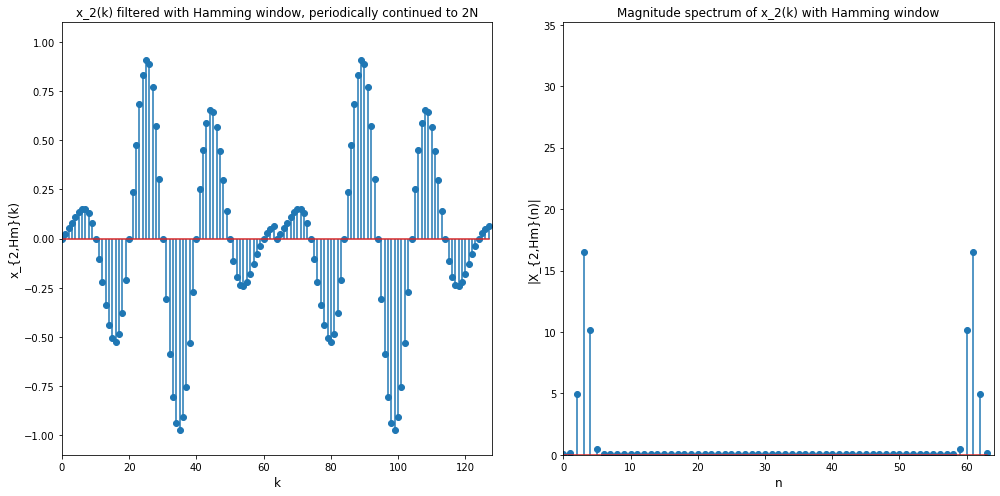

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Generating the Signal-Vector
N = 64
kk = np.arange(0,N,1)
kk2 = np.arange(0,2*N,1)

x2 = np.sin(kk*np.pi/10)

x2hm = x2*np.hamming(N)
x2hm_128  = np.append(x2hm,x2hm)

X2hm = np.fft.fft(x2hm)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].stem(kk2,x2hm_128, use_line_collection=True)
axs[1].stem(kk,np.abs(X2hm), use_line_collection=True)

axs[0].set_xlim(0,2*N)
axs[1].set_xlim(0,N)
axs[0].set_ylim(-1.1,1.1)
axs[1].set_ylim(0,1.1*N/2)

axs[0].set_title('x_2(k) filtered with Hamming window, periodically continued to 2N', fontsize='large')
axs[1].set_title('Magnitude spectrum of x_2(k) with Hamming window', fontsize='large')

axs[0].set_xlabel('k', fontsize='large')
axs[1].set_xlabel('n', fontsize='large')

axs[0].set_ylabel('x_{2,Hm}(k)', fontsize='large')
axs[1].set_ylabel('|X_{2,Hm}(n)|', fontsize='large')

plt.tight_layout()
plt.show()

### Part 2: Discrete Fourier Transform
#### Task 1: Overlap-add algorithm
The following source code for the function `ovladd` is obtained. Furthermore a small simulation allows comparison of `ovladd()`-function to the  `convolve()`-function.

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer


def ovladd(x,h):
    '''
    Convolution using overlap-add-algorithm
    x signal to convolve
    h impuls response of FIR system, max length: h << 2^10
    '''
    
    # Guideline: Blocklength of 2^p = 2^10
    p = 10
    Nfft = 2**p
    
    # Order of impuls response of FIR-filter
    m = len(h) - 1
    
    # L+m needs to be a power of two to use Radix-2 FFT
    # Nfft = m + L
    L = Nfft - m
    
    # Number of blocks R with length L
    R = int(np.ceil(len(x)/L))             # ceil(x) returns a float, but an integer is needed for np.zeros
    # Expand x to length R*L
    xz = np.append(x, np.zeros(R*L-len(x)))
    
    # (L+m)-point-FFt to calculate the systemfunction H
    # The function fft(h,Nfft) calculates the FFT of h expanded with zeros (zero padding)
    H = np.fft.fft(h,Nfft)
    
    # Divide x in sequences 
    xr = xz.reshape(R,L).T
    # xr is L x R  - matrix
    
    Xr = np.fft.fft(xr,Nfft,axis=0)        # with axis=0 FFT will be calculated over each column
    # Xr is L x Nfft - matrix
    # => "zero padding" for every column
    
    # Overlapping of blocks
    y = np.zeros(len(xz)+m, dtype=complex)
    for r in range(0,R):
        y[L*r:Nfft+L*r] += np.fft.ifft(Xr[:,r]*H)

    # Cut to origal length + m 
    y = y[0:len(x)+m]
    return y



# Comparison of Overlap-add algorithm and Convolution for N=100 
N = 100
t_ovla = 0
t_conv = 0
difference = 0
for i in range(0,N):
    x = np.random.rand(10000) + 1j*np.random.rand(10000)
    h = np.random.rand(256) + 1j*np.random.rand(256)
    start_ovla = timer()
    y1 = ovladd(x,h)
    end_ovla = timer()
    start_conv = timer()
    y2 = np.convolve(x,h)
    end_conv = timer()
    
    t_ovla += (end_ovla - start_ovla)
    t_conv += (end_conv - start_conv)
    difference += np.mean(np.abs(y1-y2)**2)

print('Execution time Overlap-add algorithm')
print(t_ovla/N)
print('Execution time Convolution')
print(t_conv/N)
print('Result comparison ')
print(difference/N)

Execution time Overlap-add algorithm
0.00035520770006769453
Execution time Convolution
0.0023816949099727935
Result comparison 
3.1696219958940985e-27
